#### Kaggle tmdb-box-office-prediction competition

https://www.kaggle.com/c/tmdb-box-office-prediction

#### Import and View Data

In [129]:
import pandas as pd
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import seaborn as sns

In [130]:
df = pd.read_csv('train.csv/train.csv')
df_temp = df
df.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


#### Clean Data

Drop unique columns

In [131]:
df = df.drop(['imdb_id'], axis=1)

Text(0.5, 1.0, 'Missing Value count By Features')

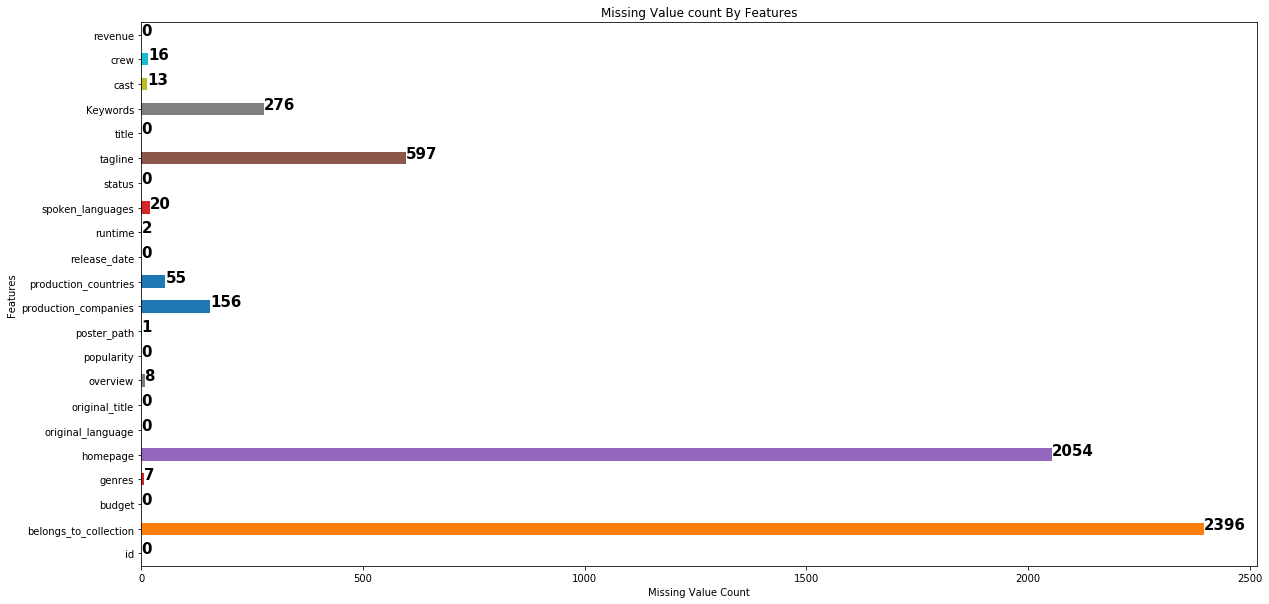

In [132]:
df.isna().sum().plot(kind="barh", figsize=(20,10))
for i, v in enumerate(df.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

Drop column where 70% data is null

In [133]:
df = df.drop(['belongs_to_collection', 'homepage'],axis = 1)

##### Cleaning genres column

In [136]:
#df['genres'] = df['genres'].astype(str)
if 'genres' in df:
    df_genres = df['genres'].str.extractall('([A-Z]\w{0,})')
    df_genres = df_genres.unstack(level=1,fill_value='Not Found')
    df_genres.columns = ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5', 'genres_6', 'genres_7', 'genres_8']
df_genres.head(3)

,genres_1,genres_2,genres_3,genres_4,genres_5,genres_6,genres_7,genres_8
0,Comedy,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found
1,Comedy,Drama,Family,Romance,Not Found,Not Found,Not Found,Not Found
2,Drama,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found


Drop old column and add new column

In [137]:
if 'genres' in df:
    df = df.drop(['genres'], axis=1)

if df_genres['genres_1'].isna().any():
    df_genres[df_genres['genres_1'].isnull()]
    
if len(df_genres) > 0:
    df = pd.concat([df, df_genres], axis =1)
    df.dropna()
df.head(2)

,id,budget,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,...,genres_7,genres_8,genres_1,genres_2,genres_3,genres_4,genres_5,genres_6,genres_7,genres_8
0,1,14000000,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,...,Not Found,Not Found,Comedy,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found
1,2,40000000,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,...,Not Found,Not Found,Comedy,Drama,Family,Romance,Not Found,Not Found,Not Found,Not Found


##### Cleaning production_companies column

In [148]:
if 'production_companies' in df:
    df_production_companies = df['production_companies'].str.extractall('([A-Z]\w{0,})')
    #df_production_companies = df_production_companies.unstack(level=1,fill_value='Not Found')
    #df_genres.columns = ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5', 'genres_6', 'genres_7', 'genres_8']
df_production_companies.head(3)

0
  match           
0 0      Paramount
  1       Pictures
  2         United

#### Check for NULL values

In [117]:
df.isna().any()

id                      False
budget                  False
original_language       False
original_title          False
overview                 True
popularity              False
poster_path              True
production_companies     True
production_countries     True
release_date            False
runtime                  True
spoken_languages         True
status                  False
tagline                  True
title                   False
Keywords                 True
cast                     True
crew                     True
revenue                 False
genres_1                 True
genres_2                 True
genres_3                 True
genres_4                 True
genres_5                 True
genres_6                 True
genres_7                 True
genres_8                 True
dtype: bool

Text(0.5, 1.0, 'Missing Value count By Features')

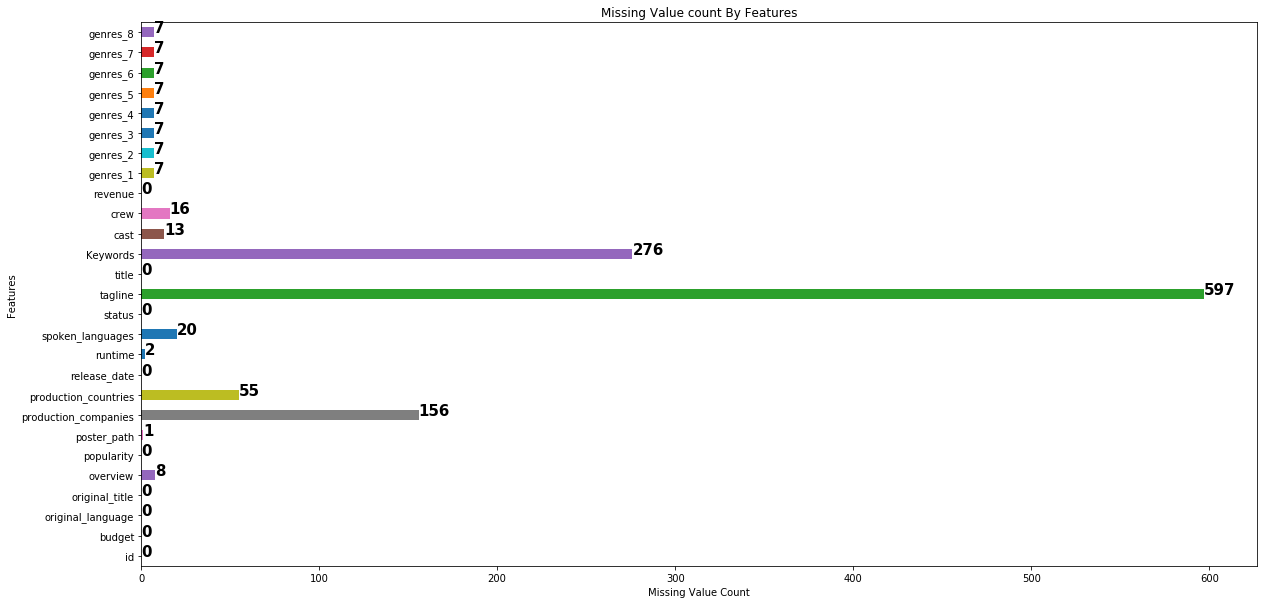

In [118]:
df.isna().sum().plot(kind="barh", figsize=(20,10))
for i, v in enumerate(df.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

#### Find co related features

In [119]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

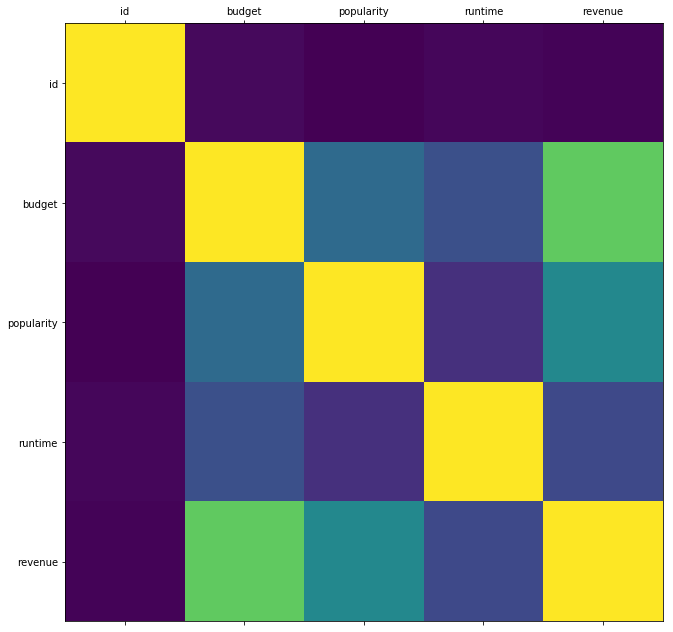

In [120]:
plot_corr(df)

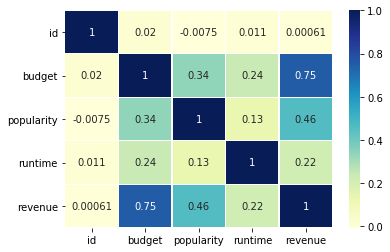

In [121]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True, linewidths = 0.2)

#### Lets explore our data more via charts

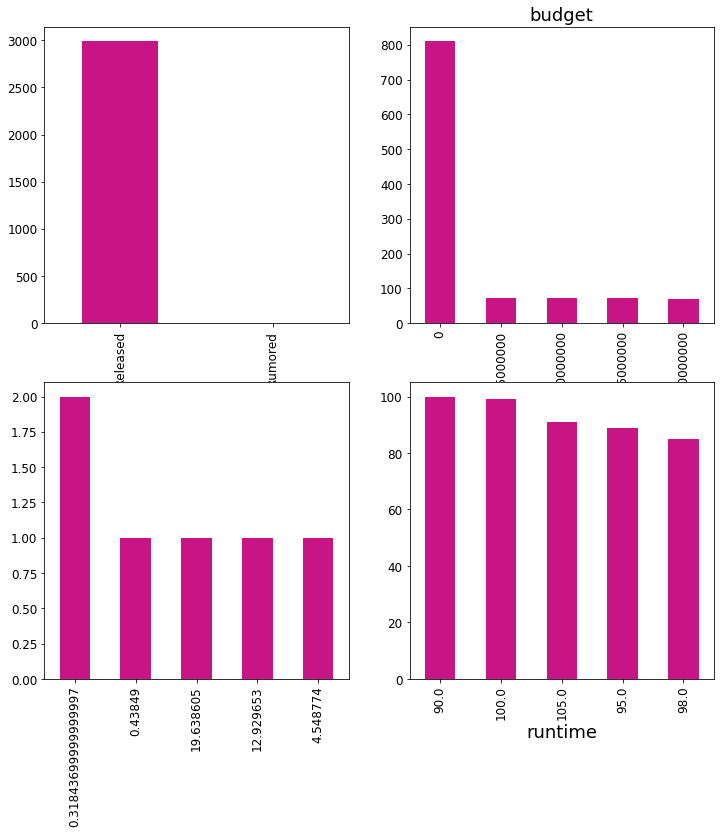

In [122]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))

df['status'].value_counts().head(5).plot.bar(ax=axarr[0][0], fontsize=12, color='mediumvioletred')
ax=axarr[0][0].set_xlabel("status", fontsize=18)
df['budget'].value_counts().head(5).plot.bar(ax=axarr[0][1], fontsize=12, color='mediumvioletred')
ax=axarr[0][1].set_title("budget", fontsize=18)
df['popularity'].value_counts().head(5).plot.bar(ax=axarr[1][0], fontsize=12, color='mediumvioletred')
ax=axarr[1][1].set_xlabel("popularity", fontsize=18)
df['runtime'].value_counts().head(5).plot.bar(ax=axarr[1][1], fontsize=12, color='mediumvioletred')
ax=axarr[1][1].set_xlabel("runtime", fontsize=18)


#### Feature Analysis

#### 1. Budget

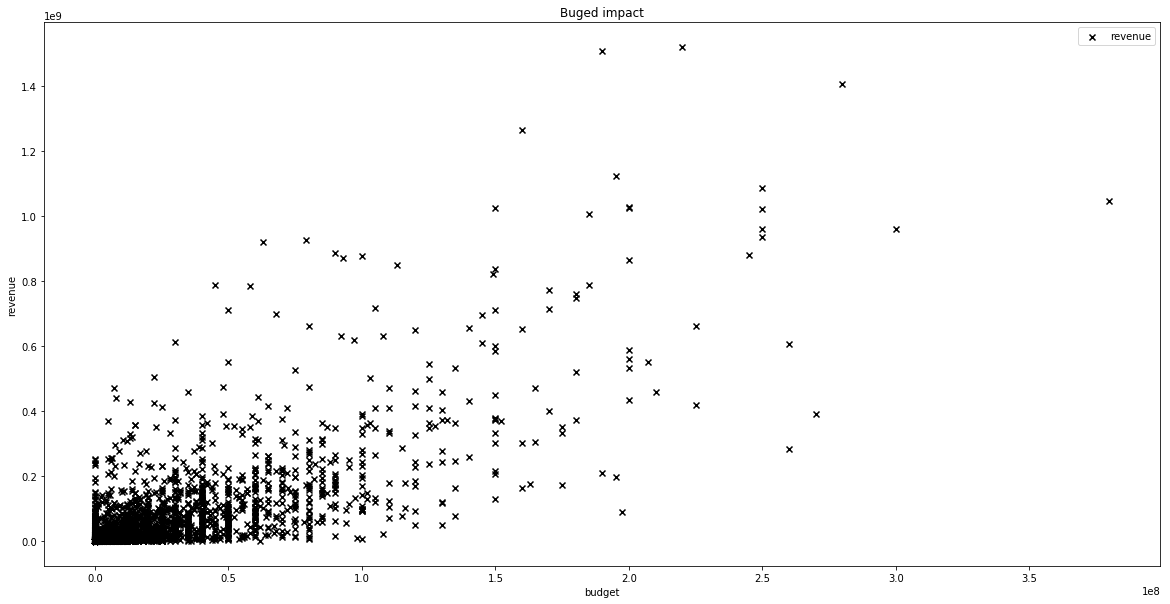

In [123]:
plt.figure(figsize=(20,10))
plt.scatter(x = df['budget'], y = df['revenue'], marker = 'x', color = 'black')

plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Buged impact')
plt.legend()
plt.show()

#### 2. Popularity

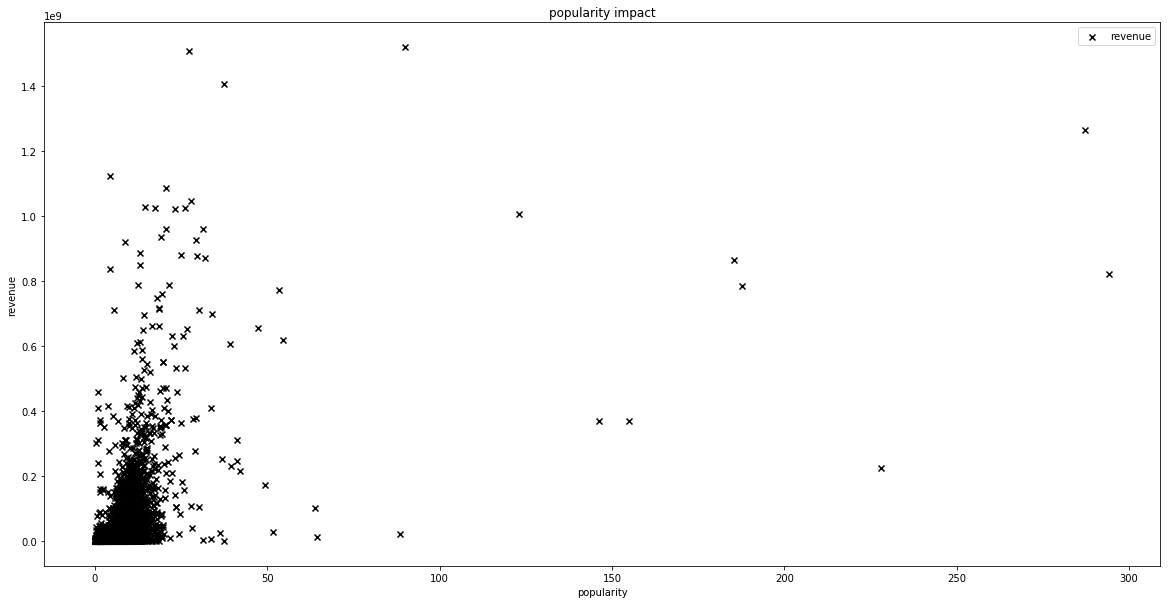

In [124]:
plt.figure(figsize=(20,10))
plt.scatter(x = df['popularity'], y = df['revenue'], marker = 'x', color = 'black')

plt.xlabel('popularity')
plt.ylabel('revenue')
plt.title('popularity impact')
plt.legend()
plt.show()

#### 3. Runtime

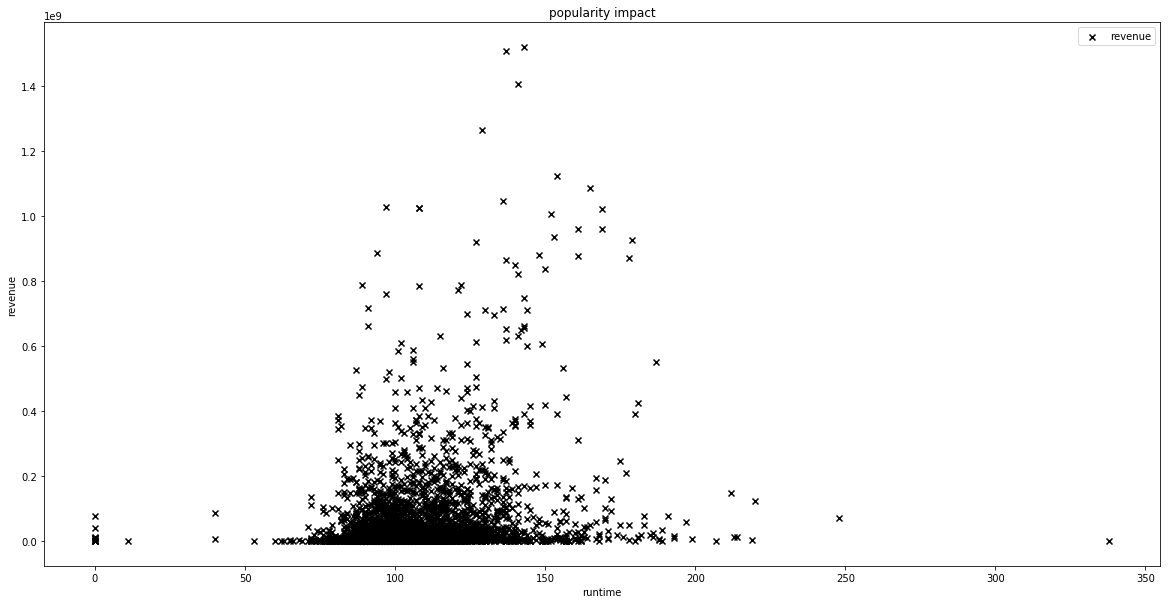

In [125]:
plt.figure(figsize=(20,10))
plt.scatter(x = df['runtime'], y = df['revenue'], marker = 'x', color = 'black')

plt.xlabel('runtime')
plt.ylabel('revenue')
plt.title('popularity impact')
plt.legend()
plt.show()

##### 4. Language

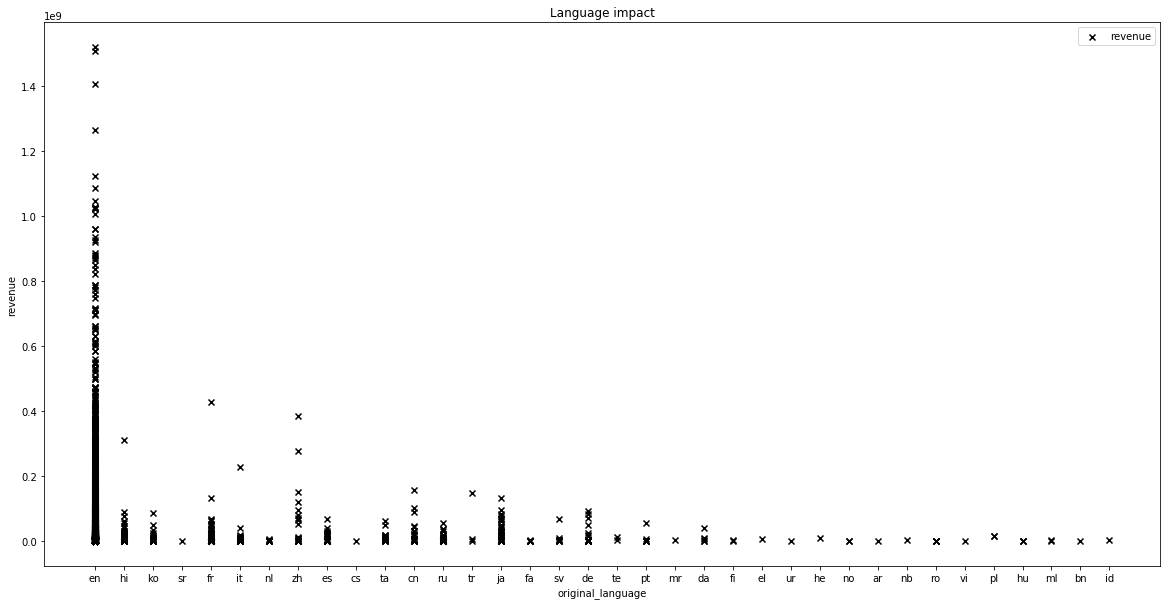

In [126]:
plt.figure(figsize=(20,10))
plt.scatter(x = df['original_language'], y = df['revenue'], marker = 'x', color = 'black')

plt.xlabel('original_language')
plt.ylabel('revenue')
plt.title('Language impact')
plt.legend()
plt.show()

##### Genres 

TypeError: nan is not a string

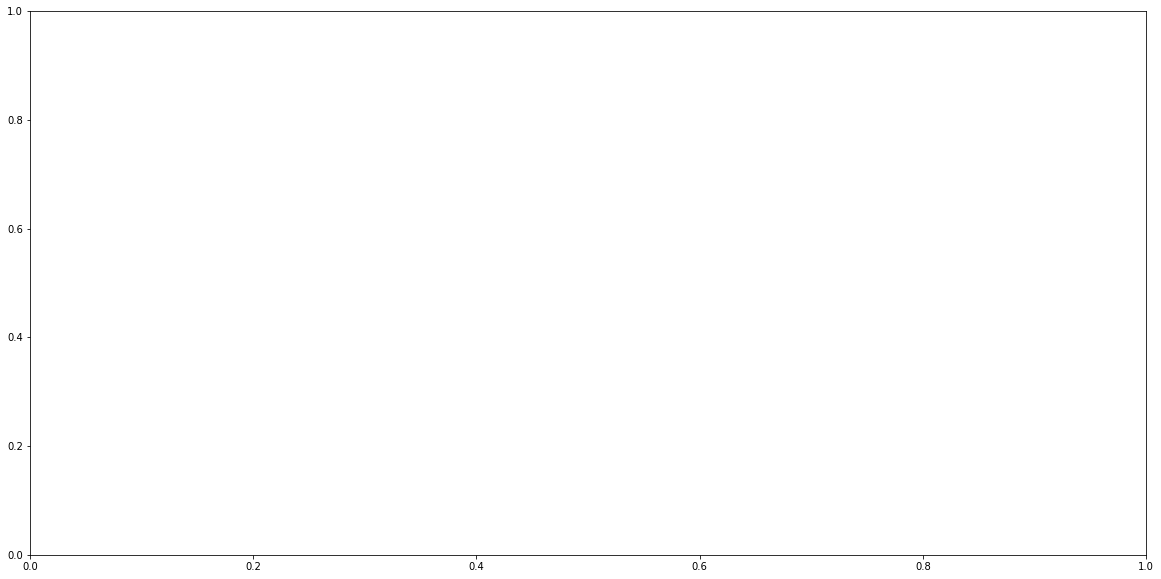

In [127]:
plt.figure(figsize=(20,10))
plt.scatter(x = df['genres_1'], y = df['revenue'], marker = 'x', color = 'black')

plt.xlabel('genres_1')
plt.ylabel('revenue')
plt.title('genres impact')
plt.legend()
plt.show()

In [ ]:
#X = df.loc[:,df.columns!='revenue']
#y = df['revenue']

df.status = pd.get_dummies(df.status)

df = df[['runtime', 'budget','popularity','status']]
df.isna().any()

#### Removing Null values from runtime

In [ ]:
# ffill: propagate last valid observation forward to next valid
# mean: takes mean of non-zero column and replaces zero with those. This should be modified
#df['runtime'] = df['runtime'].fillna(method='ffill')
mean_runtime = df['runtime'].mean(skipna=True)
mean_budget = df['budget'].mean(skipna=True)
df['runtime'] = df.runtime.replace(0, mean_runtime)
df['budget'] = df.budget.replace(0, mean_budget)
df.isna().any()

#### Check for 0 or Null values

In [ ]:
#'runtime', 'budget','popularity','status'

print("# rows in dataframe {0}".format(len(df)))
print("# rows null = %s, # of 0 = %s runtime" %(len(df.loc[df['runtime'].isnull()]), len(df.loc[df['runtime'] == 0])))
print("# rows null = %s, # of 0 = %s budget" %(len(df.loc[df['budget'].isnull()]), len(df.loc[df['budget'] == 0])))
print("# rows null = %s, # of 0 = %s popularity" %(len(df.loc[df['popularity'].isnull()]), len(df.loc[df['popularity']== 0])))
print("# rows null = %s, # of 0 = %s status" %(len(df.loc[df['status'].isnull()]), len(df.loc[df['status'] == 0])))

In [ ]:
X = df[['runtime', 'budget','popularity','status']]
y = df_temp.revenue

In [ ]:
X[:2]

In [ ]:
y[:2]

#### Split training data into training and test data

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val,y_train, y_val = train_test_split(X,y,test_size = 0.30, random_state = 42)

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_val)/len(df.index)) * 100))

### Prepare the model

##### Declare method used during model generic

RMSLE method to calculate RMSLE

In [ ]:
import numpy as np

def rmsle(y_v,y_p): 
    return np.sqrt(np.mean(np.square(np.log1p(y_v)-np.log1p(y_p)))) 

##### Plot graph 

In [ ]:
from matplotlib import pyplot

def printResult(X, y, pred, xLabel, yLabel, title):
    pyplot.scatter(X,y)
    pyplot.plot(np.sort(X,axis=0), pred)
    pyplot.xlabel(xLabel)
    pyplot.ylabel(yLabel)
    pyplot.title(title)
    pyplot.legend()
    pyplot.show()

#### 1. Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_val)
print("RMSLE(used in Kaggle competition) score of Linear Model is {}".format(rmsle(y_val,y_pred)))
print("Accuracy: {0:.4f}".format(lr_model.score(X_val,y_val)))
print("MAE: {0:.4f}".format(mean_absolute_error(y_pred, y_val)))

printResult(X_val.runtime, y_val, y_pred, 'runtime', 'revenue', 'Runtime impact on revnue')
printResult(X_val.budget, y_val, y_pred, 'budget', 'revenue', 'budget impact on revnue')
printResult(X_val.popularity, y_val, y_pred, 'popularity', 'revenue', 'popularity impact on revnue')

#### Training Data Output

In [ ]:
test = pd.read_csv('test.csv/test.csv')
test['runtime'] = test['runtime'].fillna(method='ffill')
test["status"] = pd.get_dummies(test.status)
test = test[['runtime', 'budget','popularity','status']]

y_LR_prediction = lr_model.predict(test)

sub_lr = pd.read_csv('sample_submission.csv')
sub_lr['revenue'] = y_LR_prediction
sub_lr.to_csv('LR_Submission.csv', index=False)

#### 2. RandomForestRegressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)
print("RMSLE score of Random Forest Model is {}".format(rmsle(y_val,y_pred)))
print("Accuracy: {0:.4f}".format(rf_model.score(X_val,y_val)))
print("MAE: {0:.4f}".format(mean_absolute_error(y_pred, y_val)))

printResult(X_val.runtime, y_val, y_pred, 'runtime', 'revenue', 'Runtime impact on revnue')
printResult(X_val.budget, y_val, y_pred, 'budget', 'revenue', 'budget impact on revnue')
printResult(X_val.popularity, y_val, y_pred, 'popularity', 'revenue', 'popularity impact on revnue')

##### Training Data Output

In [ ]:
y_RF_prediction = rf_model.predict(test)

sub_lr['revenue'] = y_RF_prediction
sub_lr.to_csv('RF_Submission.csv', index=False)

#### 3. KNeighborsRegressor

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

kn_model = KNeighborsRegressor()
kn_model.fit(X_train, y_train)

y_pred = kn_model.predict(X_val)
print("RMSLE score of KNeighborsRegressor Model is {}".format(rmsle(y_val,y_pred)))
print("Accuracy: {0:.4f}".format(kn_model.score(X_val,y_val)))
print("MAE: {0:.4f}".format(mean_absolute_error(y_pred, y_val)))

printResult(X_val.runtime, y_val, y_pred, 'runtime', 'revenue', 'Runtime impact on revnue')
printResult(X_val.budget, y_val, y_pred, 'budget', 'revenue', 'budget impact on revnue')
printResult(X_val.popularity, y_val, y_pred, 'popularity', 'revenue', 'popularity impact on revnue')

##### Training Data Output

In [ ]:
y_kn_prediction = kn_model.predict(test)

sub_lr['revenue'] = y_kn_prediction
sub_lr.to_csv('KN_Submission.csv', index=False)

#### 4. XGBRegressor

In [ ]:
from xgboost import XGBRegressor

xg_regressor_model = XGBRegressor()
xg_regressor_model.fit(X_train, y_train)

y_pred = xg_regressor_model.predict(X_val)
print("RMSLE score of XGBRegressor Model is {}".format(rmsle(y_val,y_pred)))
print("Accuracy: {0:.4f}".format(xg_regressor_model.score(X_val,y_val)))
print("MAE: {0:.4f}".format(mean_absolute_error(y_pred, y_val)))

printResult(X_val.runtime, y_val, y_pred, 'runtime', 'revenue', 'Runtime impact on revnue')
printResult(X_val.budget, y_val, y_pred, 'budget', 'revenue', 'budget impact on revnue')
printResult(X_val.popularity, y_val, y_pred, 'popularity', 'revenue', 'popularity impact on revnue')

##### Training Data Output

In [ ]:
y_xg_regressor_prediction = xg_regressor_model.predict(test)

sub_lr['revenue'] = y_xg_regressor_prediction
sub_lr.to_csv('XGBoost_Regressor_Submission.csv', index=False)

#### 5. XGBClassifier

In [ ]:
"""from xgboost import XGBClassifier

xg_classifier_model = XGBClassifier()
xg_classifier_model.fit(X_train, y_train)

y_pred = xg_classifier_model.predict(X_val)
print("RMSLE score of XGBClassifier Model is {}".format(rmsle(y_val,y_pred)))
print("Accuracy: {0:.4f}".format(xg_classifier_model.score(X_val,y_val)))
print("MAE: {0:.4f}".format(mean_absolute_error(y_pred, y_val)))"""

In [ ]:
"""y_xg_classifier_prediction = xg_classifier_model.predict(test)

sub_lr['revenue'] = y_xg_classifier_prediction
sub_lr.to_csv('XGBoost_Regressor_Submission.csv', index=False)"""

#### "End Of Project" Check the directory, all the o/p files will be present there. We can upload the best one in the competition